<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/notebook_2025/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
imgpath = '/content/drive/MyDrive/class/DIP1/DIP4E'
#os.listdir(imgpath)


## Basic Intensity Transforms

In [4]:
f = plt.imread(os.path.join(imgpath,'breastXray.tif'))
print(f.shape,f.dtype)

(571, 482) uint8


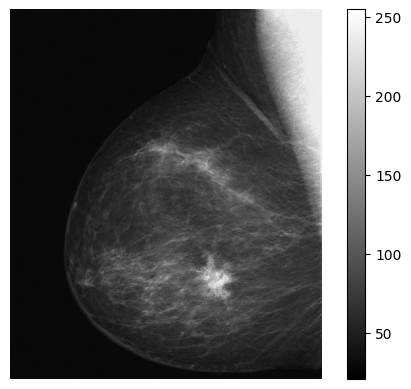

In [5]:
plt.imshow(f, cmap = 'gray')
plt.axis('off')
plt.colorbar()
plt.show()

- Image negatives

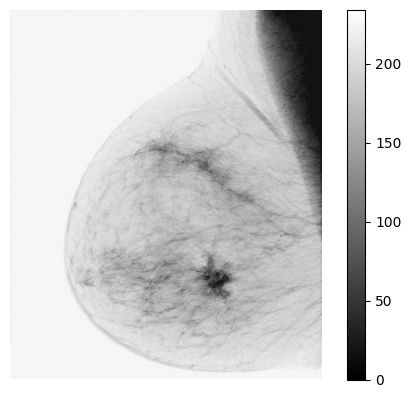

In [6]:
f_inv = np.max(f) - f
plt.imshow(f_inv, cmap = 'gray')
plt.axis('off')
plt.colorbar()
plt.show()

- log transforms

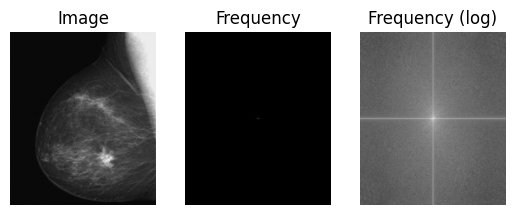

In [7]:

F = np.fft.fftshift(np.fft.fft2(f))
plt.subplot(131)
plt.imshow(f, cmap = 'gray')
plt.axis('off')
#plt.colorbar()
plt.title('Image')
plt.subplot(132)
plt.imshow(np.abs(F), cmap = 'gray')
plt.axis('off')
plt.title('Frequency')
plt.subplot(133)
plt.imshow(np.log(np.abs(F)), cmap = 'gray')
plt.axis('off')
plt.title('Frequency (log)')
#plt.colorbar()
plt.show()

- Fourier domain processing

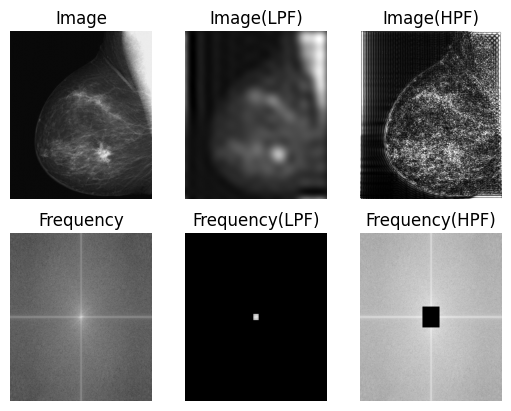

In [8]:
F_mask_lpf = np.zeros_like(F)
F_mask_lpf[275:-275,232:-232] = 1
F_lpf = F_mask_lpf*F
f_lpf = np.fft.ifft2(np.fft.fftshift(F_lpf))
F_mask_hpf = np.ones_like(F)
F_mask_hpf[250:-250,212:-212] = 0
F_hpf = F_mask_hpf*F
f_hpf = np.fft.ifft2(np.fft.fftshift(F_hpf))

plt.subplot(231)
plt.imshow(f, cmap = 'gray')
plt.axis('off')
plt.title('Image')
plt.subplot(234)
plt.imshow(np.log(np.abs(F)+.001), cmap = 'gray')
plt.axis('off')
plt.title('Frequency')
plt.subplot(232)
plt.imshow(np.abs(f_lpf), cmap = 'gray')
plt.axis('off')
plt.title('Image(LPF)')
plt.subplot(235)
plt.imshow(np.log(np.abs(F_lpf)+.001), cmap = 'gray')
plt.axis('off')
plt.title('Frequency(LPF)')
plt.subplot(233)
plt.imshow(np.abs(f_hpf), cmap = 'gray',vmin=0,vmax=16)
plt.axis('off')
plt.title('Image(HPF)')
plt.subplot(236)
plt.imshow(np.log(np.abs(F_hpf)+.001), cmap = 'gray')
plt.axis('off')
plt.title('Frequency(HPF)')
plt.show()

- gamma correction

In [9]:
f = plt.imread(imgpath+'/spine.tif')
print(f.shape,f.dtype)

(488, 373) uint8


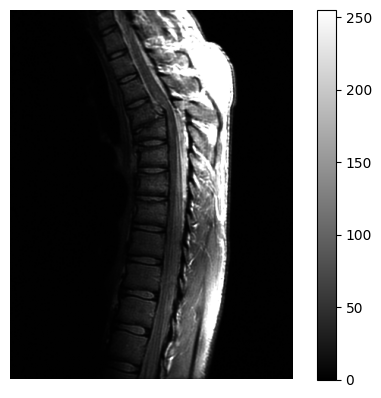

In [10]:
plt.imshow(f, cmap = 'gray')
plt.axis('off')
plt.colorbar()
plt.show()

### Exercise 1
- 아래의 예는 gamma값을 잘못 설정하여 보정을 한 것 같다. 적절한 gamma를 찾아서 영상을 개선시켜보자.

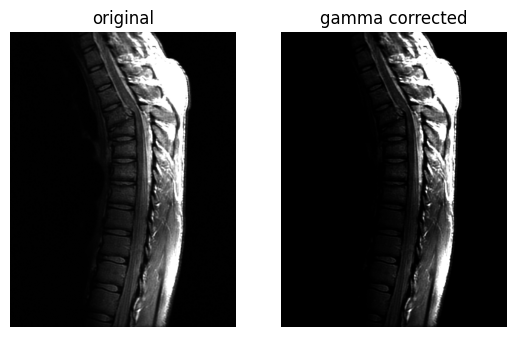

In [11]:
gamma = 1.5
f_gc = np.power(f,gamma)
c = np.max(f)/np.max(f_gc)
f_gc = c * f_gc
plt.subplot(121)
plt.title('original')
plt.axis('off')
plt.imshow(f,cmap='gray')
plt.subplot(122)
plt.imshow(f_gc,cmap='gray')
plt.title('gamma corrected')
plt.axis('off')
plt.show()

## Histogram Processing

In [12]:
f = plt.imread(imgpath+'/pollen-lowcontrast.tif')
print(f.shape,f.dtype)

(500, 500) uint8


- histogram equalization

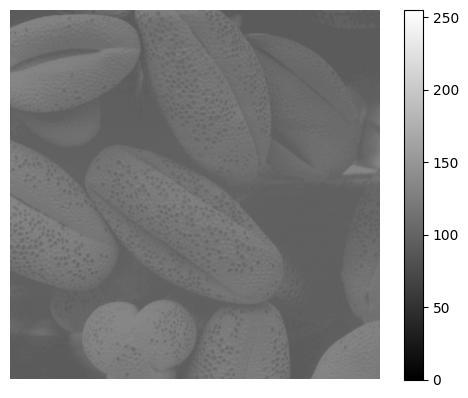

In [13]:
plt.imshow(f, cmap = 'gray', vmin=0, vmax=255)
plt.axis('off')
plt.colorbar()
plt.show()

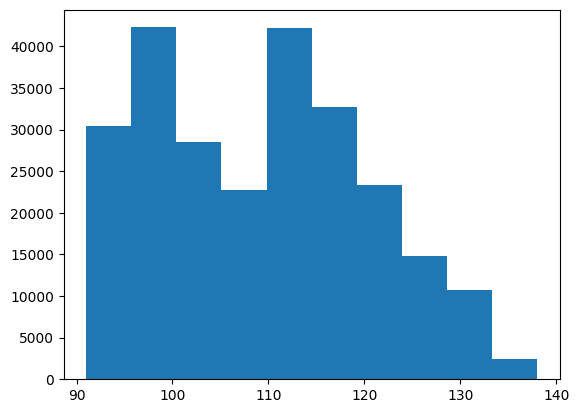

In [14]:
plt.hist(f.flatten())
plt.show()

In [15]:
def histogram_equalization(image):
    histogram, bins = np.histogram(image.flatten(), bins=256, range=[0,256])
    cdf = histogram.cumsum()
    cdf_min = cdf.min()
    cdf_max = cdf.max()
    cdf_normalized = (cdf - cdf_min) * 255 / (cdf_max - cdf_min)
    cdf_normalized = cdf_normalized.astype(np.uint8)
    equalized_image = cdf_normalized[image]
    return equalized_image

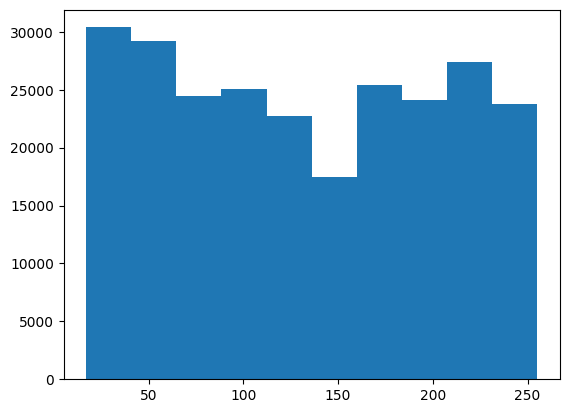

In [16]:
f_eq = histogram_equalization(f)
plt.hist(f_eq.flatten())
plt.show()

- local histogram equalization

In [17]:
f = plt.imread(imgpath+'/hidden-symbols.tif')
print(f.shape,f.dtype)

(256, 256) uint8


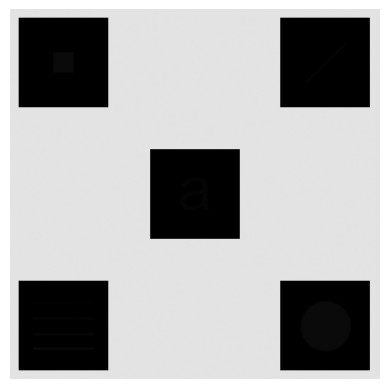

In [18]:
plt.imshow(f,vmin=0,vmax=255,cmap='gray')
plt.axis('off')
plt.show()

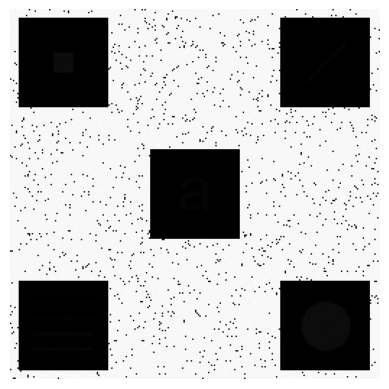

In [19]:
f_eq = histogram_equalization(f)
plt.imshow(f_eq,vmin=0,vmax=255,cmap='gray')
plt.axis('off')
plt.show()

### Exercise 2.
- 아래의 예는 local histogram equalization을 수행한다.
- 적절한 neighborhood size N을 찾아서 숨겨진 기호들을 모두 확인해보자.
- plt.imshow의 vim, vmax를 수정하여서도 숨겨진 기호들을 확인할 수 있으나, 본 실습에서는 vmax=255로 고정하여 histogram processing을 통해 숨겨진 기호들을 확인하자.

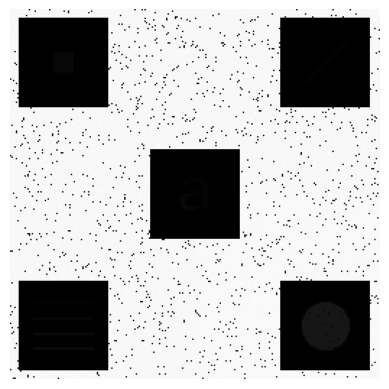

In [20]:
N = 128
f_eq_local = np.zeros_like(f)
for x in np.arange(0,256,N):
  for y in np.arange(0,256,N):
    f_eq_local[x:x+N,y:y+N] = histogram_equalization(f[x:x+N,y:y+N])

plt.imshow(f_eq_local,vmin=0,vmax=255,cmap='gray')
plt.axis('off')
plt.show()


# Linear Spatial Filtering
## 2D convolution

In [21]:
import scipy.signal as signal
from skimage import io

In [22]:
f = io.imread('https://bme.hufs.ac.kr/CrossEditor/binary/images/000355/MT_4.jpeg',as_gray=True)[::2,::2]
print(f.shape,f.dtype)

(525, 700) float64


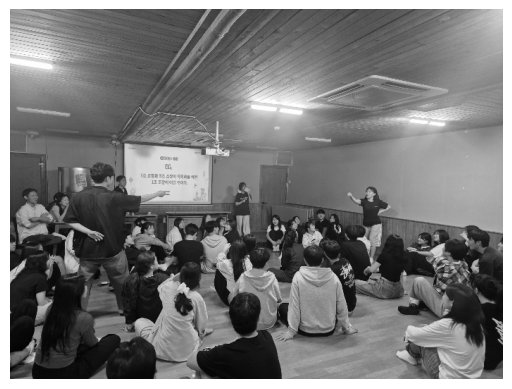

In [23]:
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.show()

In [24]:
w = np.random.randn(3,3)
#w = np.array([[1,-2,1],
#              [1,-2,1],
#              [1,-2,1]])
print(w)

[[ 1.94319271  0.14920021 -0.96930021]
 [-0.44303522  0.9485579  -0.60220114]
 [ 0.04692335  0.52346309  0.88702242]]


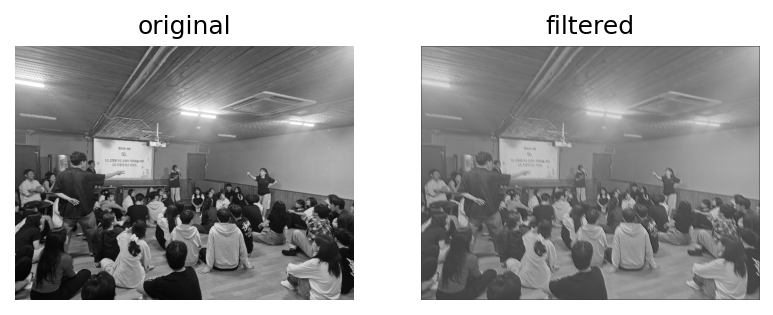

In [25]:
sz0,sz1 = f.shape
y = np.zeros_like(f)
for i in np.arange(1,sz0-1):
  for j in np.arange(1,sz1-1):
    y[i,j] = np.sum(f[i-1:i+2,j-1:j+2]*w[::-1,::-1])

plt.figure(dpi=150)
plt.subplot(1,2,1)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(y,cmap='gray')
plt.axis('off')
plt.title('filtered')
plt.show()

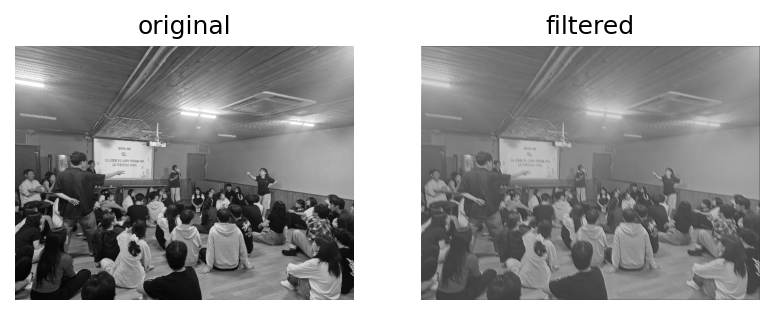

In [26]:
y = signal.convolve2d(f,w,mode='same')
y.shape
plt.figure(dpi=150)
plt.subplot(121)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.title('original')
plt.subplot(122)
plt.imshow(y,cmap='gray')
plt.axis('off')
plt.title('filtered')
plt.show()

## low pass filtering - box kernel

In [27]:
w = np.ones((3,3))
w = w/np.sum(w)
print(w)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [28]:
yb = signal.convolve2d(f,w,mode='same')


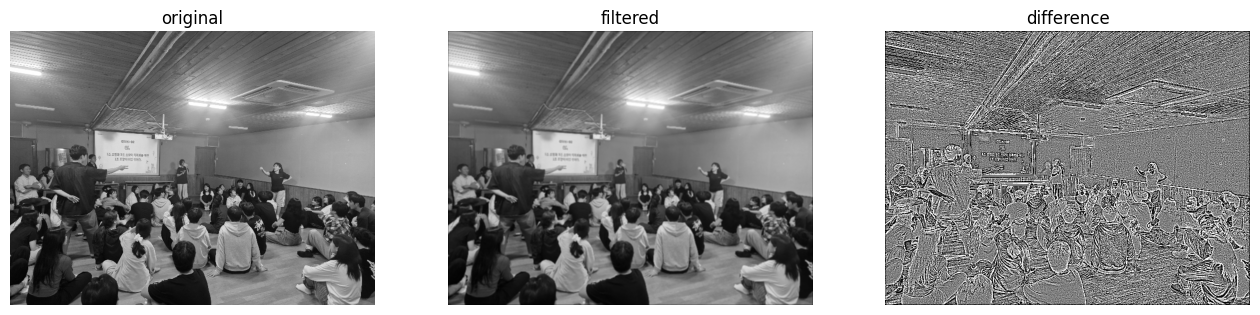

In [29]:
plt.figure(figsize=(16,9))
plt.subplot(1,3,1)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(yb,cmap='gray')
plt.axis('off')
plt.title('filtered')
plt.subplot(1,3,3)
plt.imshow(yb-f,cmap='gray',vmin=-.01,vmax=.01)
plt.axis('off')
plt.title('difference')
plt.show()

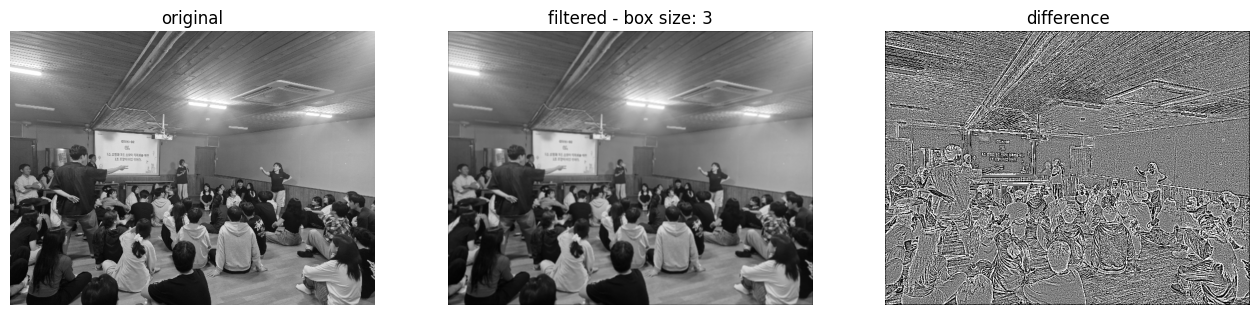

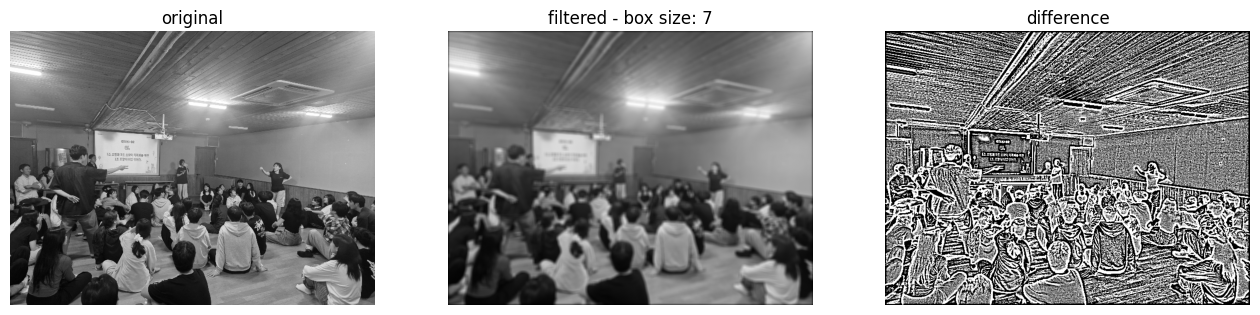

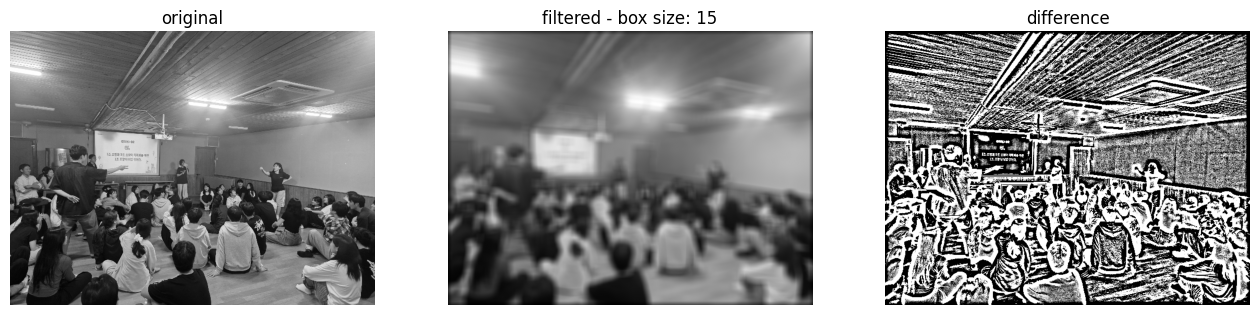

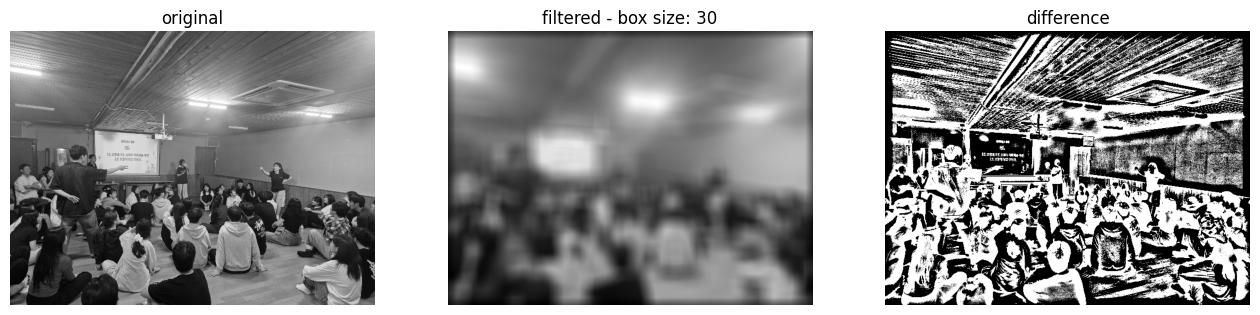

In [30]:
for N in np.array([3,7,15,30]):
  wb = np.ones((N,N))
  wb = wb/np.sum(wb)
  y_b = signal.convolve2d(f,wb,mode='same')

  plt.figure(figsize=(16,9))
  plt.subplot(1,3,1)
  plt.imshow(f,cmap='gray')
  plt.axis('off')
  plt.title('original')
  plt.subplot(1,3,2)
  plt.imshow(y_b,cmap='gray')
  plt.axis('off')
  plt.title(f'filtered - box size: {N}')
  plt.subplot(1,3,3)
  plt.imshow(y_b-f,cmap='gray',vmin=-.01,vmax=.01)
  plt.axis('off')
  plt.title('difference')
  plt.show()

## lowpass filtering - Gaussian kernel

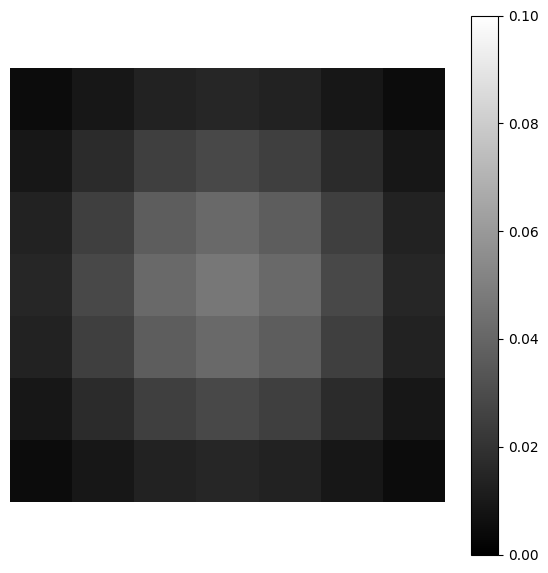

In [31]:
N = 3
std = 2
s = np.arange(-N,N+1,1)
t = np.arange(-N,N+1,1)
S,T = np.meshgrid(s,t)
wg = np.exp(-(S**2+T**2)/(2*std*std))
wg = wg/np.sum(wg)

plt.figure(figsize=(7,7))
plt.imshow(wg,vmin=0,vmax=0.1,cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()

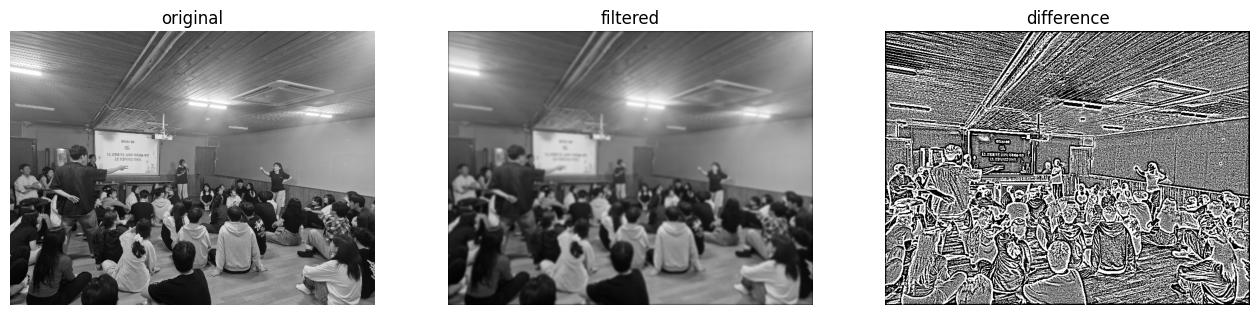

In [32]:
y_g = signal.convolve2d(f,wg,mode='same')

plt.figure(figsize=(16,9))
plt.subplot(1,3,1)
plt.imshow(f,cmap='gray')
plt.axis('off')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(y_g,cmap='gray')
plt.axis('off')
plt.title('filtered')
plt.subplot(1,3,3)
plt.imshow(y_g-f,cmap='gray',vmin=-.01,vmax=.01)
plt.axis('off')
plt.title('difference')
plt.show()

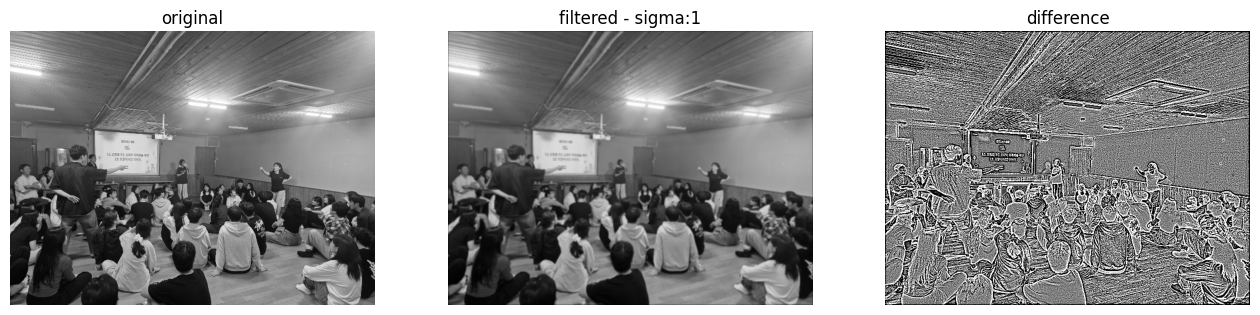

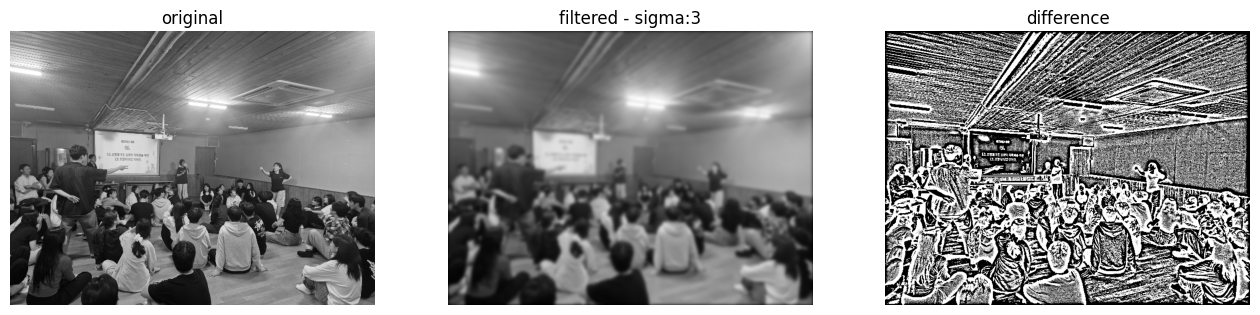

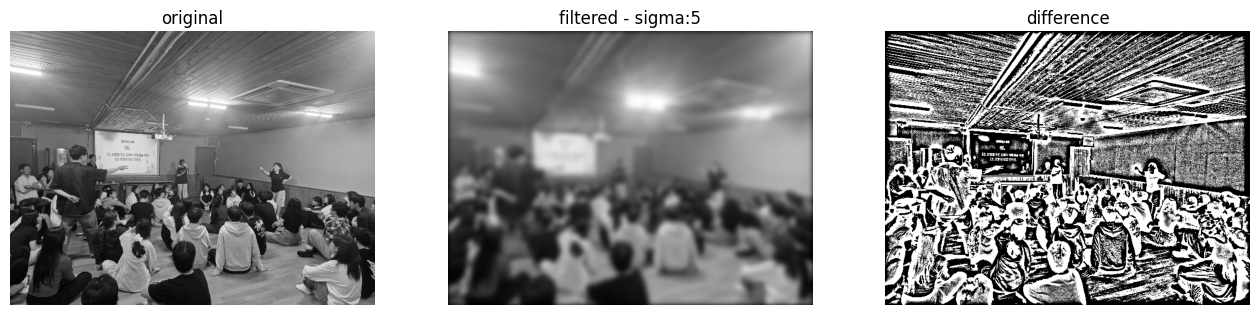

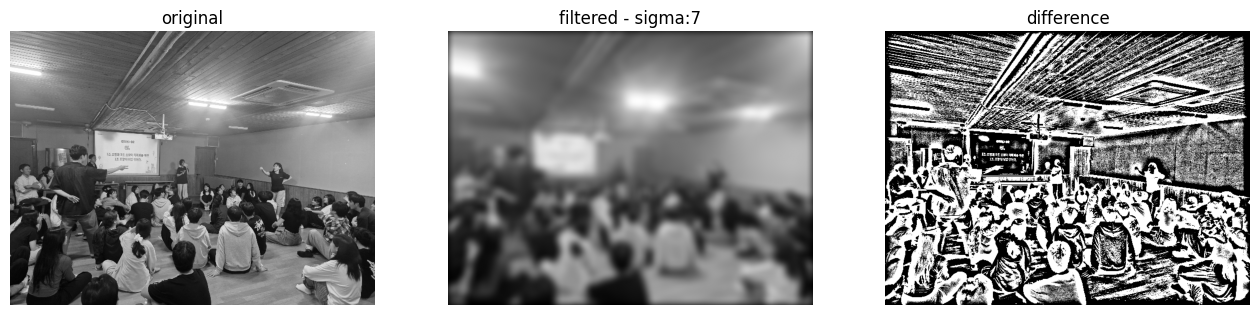

In [33]:
s = np.arange(-13,14,1)
t = np.arange(-13,14,1)
S,T = np.meshgrid(s,t)

for std in np.array([1,3,5,7]):
  wg = np.exp(-(S**2+T**2)/(2*std*std))
  wg = wg/np.sum(wg)

  y_g = signal.convolve2d(f,wg,mode='same')

  plt.figure(figsize=(16,9))
  plt.subplot(1,3,1)
  plt.imshow(f,cmap='gray')
  plt.axis('off')
  plt.title('original')
  plt.subplot(1,3,2)
  plt.imshow(y_g,cmap='gray')
  plt.axis('off')
  plt.title(f'filtered - sigma:{std}')
  plt.subplot(1,3,3)
  plt.imshow(y_g-f,cmap='gray',vmin=-.01, vmax=.01)
  plt.axis('off')
  plt.title('difference')
  plt.show()

### Exercise 3.
- 직접 찍은 사진을 grayscale image로 불러와서, kernel size를 3x3, 7x7, 15x15, 30x30 으로 늘려가며 box kernel을 정의하여 LPF를 진행한 결과를 출력하고 kernel size에 따른 연산시간의 차이를 확인하자.

In [34]:
f = io.imread('your image',as_gray=True)
print(f.shape,f.dtype)

(1050, 1400) float64


In [35]:
import time

In [ ]:
for N in np.array([3,7,15,30]):
  wb = np.ones((N,N))
  wb = wb/np.sum(wb)
  s0 = time.time()
  y_b = signal.convolve2d(f,wb,mode='same')
  compu_time=time.time() - s0
  print('computation time = ', compu_time,' sec')
  plt.figure(figsize=(16,9))
  plt.subplot(1,3,1)
  plt.imshow(f,cmap='gray')
  plt.axis('off')
  plt.title('original')
  plt.subplot(1,3,2)
  plt.imshow(y_b,cmap='gray')
  plt.axis('off')
  plt.title(f'filtered - box size: {N}')
  plt.subplot(1,3,3)
  plt.imshow(y_b-f,cmap='gray',vmin=-.01,vmax=.01)
  plt.axis('off')
  plt.title('difference')
  plt.show()